In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [35]:
base_dados = pd.read_csv('dados_limpos.csv')

In [36]:
# Remover a coluna 'FRP'
base_dados = base_dados.drop(columns=['FRP'])

# Remover as linhas com dados nulos nas colunas 'DiaSemChuva', 'Precipitacao', 'RiscoFogo'
base_dados = base_dados.dropna(subset=['DiaSemChuva', 'Precipitacao', 'RiscoFogo'])

# Converter a coluna 'DataHora' para o formato datetime
base_dados['DataHora'] = pd.to_datetime(base_dados['DataHora'])

In [37]:
import pandas as pd

# Supondo que o DataFrame base_dados já esteja carregado

# Filtrar os dados para manter apenas os valores de RiscoFogo entre 0 e 1
filtered_base_dados = base_dados[(base_dados['RiscoFogo'] >= 0)]

# Exibir algumas informações sobre os dados filtrados
print(f"Número de linhas antes de remover outliers: {len(base_dados)}")
print(f"Número de linhas após remover outliers: {len(filtered_base_dados)}")


Número de linhas antes de remover outliers: 35152677
Número de linhas após remover outliers: 34849126


In [38]:
positive_base_dados = base_dados[(base_dados['RiscoFogo'] > 1)]


In [39]:
negative_base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303551 entries, 1301535 to 36850702
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DataHora      303551 non-null  datetime64[ns]
 1   Satelite      303551 non-null  object        
 2   Pais          303551 non-null  object        
 3   Estado        303551 non-null  object        
 4   Municipio     303551 non-null  object        
 5   Bioma         303428 non-null  object        
 6   DiaSemChuva   303551 non-null  float64       
 7   Precipitacao  303551 non-null  float64       
 8   RiscoFogo     303551 non-null  float64       
 9   Latitude      303551 non-null  float64       
 10  Longitude     303551 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 27.8+ MB


In [40]:
34849126 - 35152677 


-303551

C:\Users\gustavo.j.siebel\AppData\Local\Temp\ipykernel_4308\656509466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_base_dados['DataHora'] = pd.to_datetime(filtered_base_dados['DataHora'])


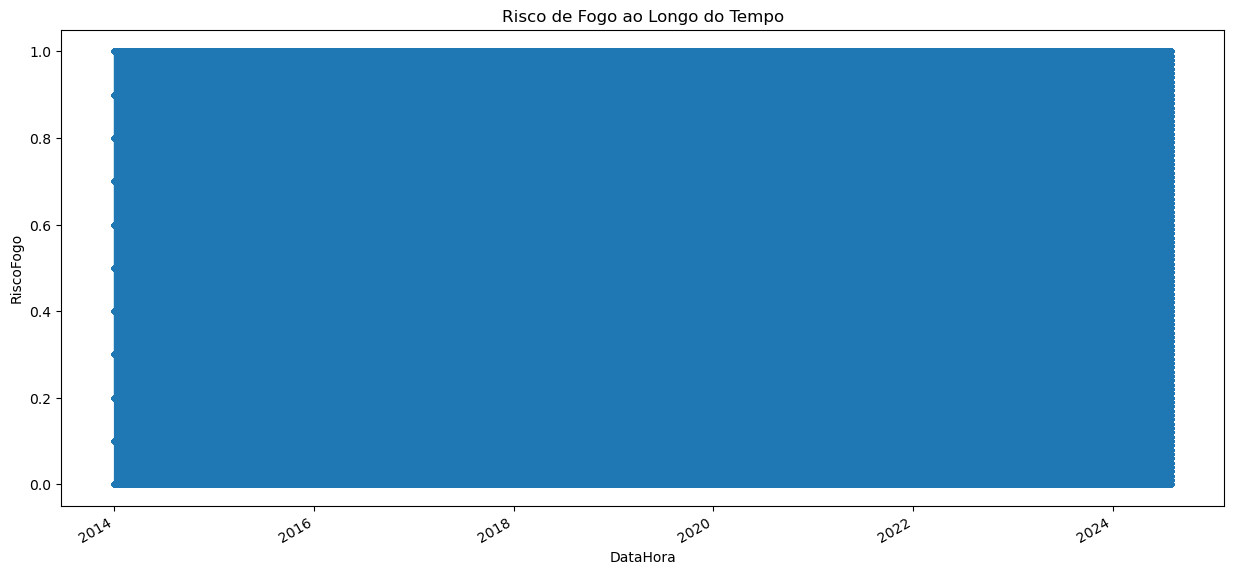

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu dataframe se chame 'negative_base_dados'
# Certifique-se de que a coluna 'DataHora' é do tipo datetime
filtered_base_dados['DataHora'] = pd.to_datetime(filtered_base_dados['DataHora'])

# Criar o gráfico temporal
plt.figure(figsize=(15, 7))
plt.plot(filtered_base_dados['DataHora'], filtered_base_dados['RiscoFogo'], marker='.', linestyle='-', linewidth=0.5)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Fogo ao Longo do Tempo')
plt.xlabel('DataHora')
plt.ylabel('RiscoFogo')

# Melhorar a formatação da linha do tempo
plt.gcf().autofmt_xdate()

# Mostrar o gráfico
plt.show()


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Caminho da pasta onde estão os arquivos CSV
caminho_pasta = 'dados\Focos Incendio 2013-2023'

# Lista todos os arquivos na pasta
arquivos_csv = [f for f in os.listdir(caminho_pasta) if f.endswith('.csv')]


In [3]:
# Lista para armazenar DataFrames
dataframes = []

In [4]:
# Lê cada arquivo CSV e armazena no DataFrame
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(caminho_pasta, arquivo)
    df = pd.read_csv(caminho_arquivo)
    dataframes.append(df)

# Concatena todos os DataFrames em um único DataFrame
base_dados = pd.concat(dataframes, ignore_index=True)

In [5]:
# Exibe as primeiras linhas do DataFrame concatenado
base_dados.head()

,id_bdq,foco_id,lat,lon,data_pas,pais,estado,municipio,bioma
0,129395262,423e9a18-5abb-11e8-911c-28924ad12c5c,-10.983,-37.953,2014-02-16 16:09:00,Brasil,SERGIPE,TOBIAS BARRETO,Caatinga
1,129395261,423e9a17-5abb-11e8-911c-28924ad12c5c,-10.934,-37.731,2014-02-16 16:09:00,Brasil,SERGIPE,LAGARTO,Caatinga
2,129400676,86bb03da-5aba-11e8-911c-28924ad12c5c,1.662,-60.695,2014-02-16 17:51:00,Brasil,RORAIMA,CARACARAÍ,Amazônia
3,129400677,86bb03db-5aba-11e8-911c-28924ad12c5c,-0.068,-66.978,2014-02-16 17:51:00,Brasil,AMAZONAS,SÃO GABRIEL DA CACHOEIRA,Amazônia
4,129400678,86bb03dc-5aba-11e8-911c-28924ad12c5c,1.855,-60.844,2014-02-16 17:51:00,Brasil,RORAIMA,CARACARAÍ,Amazônia


In [7]:
print("Número de linhas duplicadas antes da limpeza:", base_dados.duplicated().sum())


Número de linhas duplicadas antes da limpeza: 0


In [ ]:
#Verifica se ainda há linhas duplicadas
#duplicated_rows = base_dados[base_dados.duplicated(subset=['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude'], keep=False)]
duplicated_rows = base_dados[base_dados.duplicated()]
# Exibir as linhas duplicadas
duplicated_rows

In [16]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912439 entries, 0 to 1912438
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id_bdq     int64  
 1   foco_id    object 
 2   lat        float64
 3   lon        float64
 4   data_pas   object 
 5   pais       object 
 6   estado     object 
 7   municipio  object 
 8   bioma      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 131.3+ MB


In [21]:
df = base_dados

# Convertendo a coluna data_pas para datetime
df['data_pas'] = pd.to_datetime(df['data_pas'])

# Verificando duplicatas e removendo
df = df.drop_duplicates()



In [24]:
df.to_csv('focos_incendio_geral.csv')